In [1]:
#compare the CV values of czechowski et al 2005 (microarray) and those from the RNA-seq in Mergner et al 2020

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# def make_plot(df,x_variable, y_variable,x_label, y_label, output_prefix, plot_kind):
#     """function to make and save plot"""
#     #allow colour codes in seaborn
#     sns.set(color_codes=True)
#     sns.set_style("whitegrid")
#     #plot
#     plot = sns.catplot(x=x_variable, y=y_variable, data=df, kind=plot_kind)
#     #plot points
#     ax = sns.swarmplot(x=x_variable, y=y_variable, data=df, color=".25")
#     #change axes labels
#     plt.ylabel(y_label)
#     plt.xlabel(x_label)
#     #save figure
#     ax.get_figure().savefig(f'../../data/output/{file_names}/{dependent_variable}/plots/{output_prefix}_{plot_kind}.pdf', format='pdf')   

In [3]:
def all_prom_distribution(df, x_variable, x_label, df2=pd.DataFrame()):
    """function to return distribution plot of all promoters GC content""" 
    if df2.empty:
    
        dist_plot = df[x_variable]
        #create figure with no transparency
        dist_plot_fig = sns.distplot(dist_plot).get_figure()
        plt.xlabel(x_label)
    else:
        dist_plot1 = df[x_variable]
        dist_plot2 = df2[x_variable]
        sns.distplot(dist_plot1,hist=False, rug=True)
        sns.distplot(dist_plot2,hist=False, rug=True).get_figure()

    #save to file
    #dist_plot_fig.savefig(f'../../data/output/{file_names}/{dependent_variable}/plots/{output_prefix}_distribution.pdf', format='pdf')    

In [4]:
czechowski = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_czechowski_constitutive_variable_random.txt'
czechowski_all = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_czechowski_allfilteredgenes.txt'
mergner = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_mergner_constitutive_variable_random.txt'
mergner_all = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_mergner_allfilteredgenes.txt'

In [5]:
czechowski_df = pd.read_table(czechowski, sep='\t', header=None)
mergner_df = pd.read_table(mergner, sep='\t', header=None)
cols = ['AGI', 'gene_type']
czechowski_df.columns = cols
mergner_df.columns = cols

In [6]:
#read in all genes
czechowski_all_df = pd.read_table(czechowski_all, sep='\t', header=0)
mergner_all_df = pd.read_csv(mergner_all, sep='\t',header=0)

In [7]:
mergner_all_df

,chr,start,stop,AGI,dot1,strand,source,type,dot2,attributes,transcription_class,transcription_family,expression_CV,presence_in_araport11
0,1,30068518,30070022,AT1G79940,.,+,araport11,promoter,.,ID=gene:AT1G79940;Name=ERDJ2A;biotype=protein_...,NaN,NaN,0.181119,1.0
1,3,18488381,18489450,AT3G49850,.,+,araport11,promoter,.,ID=gene:AT3G49850;Name=TRB3;biotype=protein_co...,TF,MYB-related,0.211639,1.0
2,1,20186824,20188096,AT1G54080,.,-,araport11,promoter,.,ID=gene:AT1G54080;Name=UBP1A;biotype=protein_c...,NaN,NaN,0.214741,1.0
3,1,28630789,28631403,AT1G76320,.,+,araport11,promoter,.,ID=gene:AT1G76320;Name=FRS4;biotype=protein_co...,TF,FAR1,0.215190,1.0
4,3,5455942,5456512,AT3G16090,.,+,araport11,promoter,.,ID=gene:AT3G16090;Name=HRD1A;biotype=protein_c...,NaN,NaN,0.216473,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17642,3,977474,978264,AT3G03826,.,+,araport11,promoter,.,ID=gene:AT3G03826;biotype=protein_coding;descr...,NaN,NaN,5.385165,1.0
17643,4,6618426,6618675,AT4G10740,.,-,araport11,promoter,.,ID=gene:AT4G10740;biotype=protein_coding;descr...,NaN,NaN,5.385165,1.0
17644,3,10358116,10359281,AT3G27910,.,-,araport11,promoter,.,ID=gene:AT3G27910;biotype=protein_coding;descr...,NaN,NaN,5.385165,1.0
17645,5,19818947,19820352,AT5G48890,.,+,araport11,promoter,.,ID=gene:AT5G48890;Name=LATE;biotype=protein_co...,NaN,NaN,5.385165,1.0


In [8]:
inboth = czechowski_df[czechowski_df.AGI.isin(mergner_df.AGI)]
len(inboth[inboth.gene_type == 'constitutive'])

15

In [9]:
len(inboth[inboth.gene_type == 'variable'])

0

In [10]:
len(inboth[inboth.gene_type == 'random'])

0

In [11]:
mergner_df

,AGI,gene_type
0,AT1G79940,constitutive
1,AT3G49850,constitutive
2,AT1G54080,constitutive
3,AT1G76320,constitutive
4,AT3G16090,constitutive
...,...,...
295,AT5G52500,control
296,AT3G45800,control
297,AT1G34500,control
298,AT4G39250,control


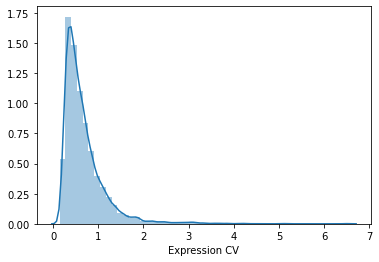

In [12]:
#all czechowski CV distribution plot
all_prom_distribution(czechowski_all_df,'expression_CV', 'Expression CV')

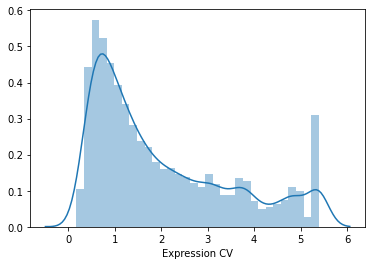

In [13]:
#all mergner CV distribution plot
all_prom_distribution(mergner_all_df,'expression_CV', 'Expression CV')

In [14]:
#plot CV from RNA-seq for top variable and top constitutive genes from microarray'
merged = pd.merge(czechowski_df,mergner_all_df, on='AGI', how='left')

In [22]:
merged

,AGI,gene_type,chr,start,stop,dot1,strand,source,type,dot2,attributes,transcription_class,transcription_family,expression_CV,presence_in_araport11
0,AT4G34270,constitutive,4.0,16406153.0,16406940.0,.,-,araport11,promoter,.,ID=gene:AT4G34270;Name=TIP41L;biotype=protein_...,NaN,NaN,0.330810,1.0
1,AT4G33380,constitutive,4.0,16071405.0,16072063.0,.,+,araport11,promoter,.,ID=gene:AT4G33380;biotype=protein_coding;descr...,NaN,NaN,0.301339,1.0
2,AT1G13320,constitutive,1.0,4567348.0,4567934.0,.,-,araport11,promoter,.,ID=gene:AT1G13320;Name=PP2AA3;biotype=protein_...,NaN,NaN,0.449014,1.0
3,AT2G28390,constitutive,2.0,12143375.0,12144665.0,.,-,araport11,promoter,.,ID=gene:AT2G28390;Name=MON1;biotype=protein_co...,NaN,NaN,0.219592,1.0
4,AT1G71820,constitutive,1.0,27008563.0,27010021.0,.,+,araport11,promoter,.,ID=gene:AT1G71820;Name=SEC6;biotype=protein_co...,NaN,NaN,1.010805,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,AT5G02100,control,5.0,412919.0,413638.0,.,+,araport11,promoter,.,ID=gene:AT5G02100;Name=ORP3A;biotype=protein_c...,NaN,NaN,3.288092,1.0
296,AT2G27830,control,2.0,11859217.0,11860733.0,.,+,araport11,promoter,.,ID=gene:AT2G27830;biotype=protein_coding;descr...,NaN,NaN,1.098677,1.0
297,AT4G27652,control,4.0,13808778.0,13809944.0,.,+,araport11,promoter,.,ID=gene:AT4G27652;biotype=protein_coding;descr...,NaN,NaN,1.585511,1.0
298,AT5G65710,control,5.0,26291371.0,26292371.0,.,+,araport11,promoter,.,ID=gene:AT5G65710;Name=HSL2;biotype=protein_co...,NaN,NaN,1.060255,1.0


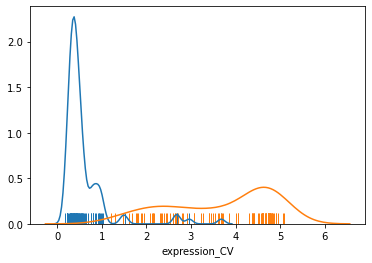

In [15]:
all_prom_distribution(merged[merged.gene_type == 'constitutive'],'expression_CV', 'Expression CV', merged[merged.gene_type == 'variable'])

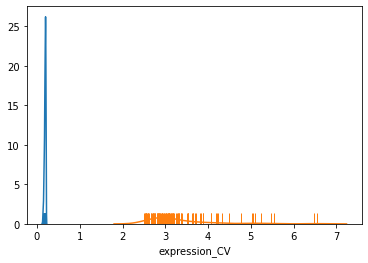

In [21]:
#czechovski CV distribution
merged_czechowski =pd.merge(czechowski_df,czechowski_all_df, on='AGI', how='left')
all_prom_distribution(merged_czechowski[merged_czechowski.gene_type == 'constitutive'],'expression_CV', 'Expression CV',merged_czechowski[merged_czechowski.gene_type == 'variable'])

/home/witham/opt/anaconda3/envs/PromoterArchitecturePipeline/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


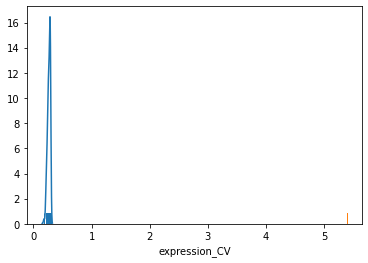

In [17]:
#mergner CV distribution
merged_mergner =pd.merge(mergner_df,mergner_all_df, on='AGI', how='left')
all_prom_distribution(merged_mergner[merged_mergner.gene_type == 'constitutive'],'expression_CV', 'Expression CV',merged_mergner[merged_mergner.gene_type == 'variable'])

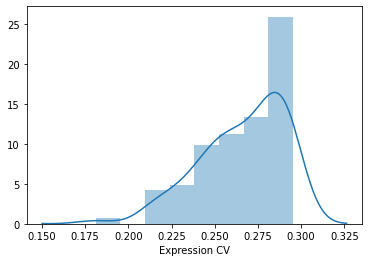

In [18]:
all_prom_distribution(merged_mergner[merged_mergner.gene_type == 'constitutive'],'expression_CV', 'Expression CV')

/home/witham/opt/anaconda3/envs/PromoterArchitecturePipeline/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


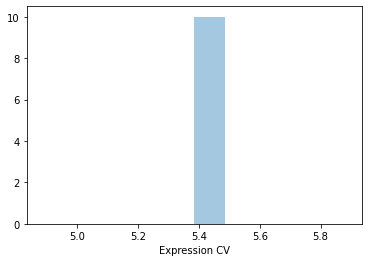

In [19]:
all_prom_distribution(merged_mergner[merged_mergner.gene_type == 'variable'],'expression_CV', 'Expression CV')

In [20]:
merged_mergner[merged_mergner.gene_type == 'variable']

,AGI,gene_type,chr,start,stop,dot1,strand,source,type,dot2,attributes,transcription_class,transcription_family,expression_CV,presence_in_araport11
100,AT3G61829,variable,3,22887322,22887888,.,-,araport11,promoter,.,ID=gene:AT3G61829;biotype=protein_coding;descr...,NaN,NaN,5.385165,1.0
101,AT3G32160,variable,3,13144825,13145439,.,+,araport11,promoter,.,ID=gene:AT3G32160;biotype=protein_coding;descr...,NaN,NaN,5.385165,1.0
102,AT5G23650,variable,5,7968811,7969811,.,+,araport11,promoter,.,ID=gene:AT5G23650;biotype=protein_coding;descr...,TF,MYB,5.385165,1.0
103,AT1G26773,variable,1,9263403,9264403,.,+,araport11,promoter,.,ID=gene:AT1G26773;biotype=protein_coding;descr...,NaN,NaN,5.385165,1.0
104,AT4G11940,variable,4,7167172,7168172,.,+,araport11,promoter,.,ID=gene:AT4G11940;Name=ADM;biotype=protein_cod...,NaN,NaN,5.385165,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,AT3G03826,variable,3,977474,978264,.,+,araport11,promoter,.,ID=gene:AT3G03826;biotype=protein_coding;descr...,NaN,NaN,5.385165,1.0
196,AT4G10740,variable,4,6618426,6618675,.,-,araport11,promoter,.,ID=gene:AT4G10740;biotype=protein_coding;descr...,NaN,NaN,5.385165,1.0
197,AT3G27910,variable,3,10358116,10359281,.,-,araport11,promoter,.,ID=gene:AT3G27910;biotype=protein_coding;descr...,NaN,NaN,5.385165,1.0
198,AT5G48890,variable,5,19818947,19820352,.,+,araport11,promoter,.,ID=gene:AT5G48890;Name=LATE;biotype=protein_co...,NaN,NaN,5.385165,1.0
